1615. Maximal Network Rank

There is an infrastructure of n cities with some number of roads connecting these cities. Each roads[i] = [ai, bi] indicates that there is a bidirectional road between cities ai and bi.

The network rank of two different cities is defined as the total number of directly connected roads to either city. If a road is directly connected to both cities, it is only counted once.

The maximal network rank of the infrastructure is the maximum network rank of all pairs of different cities.

Given the integer n and the array roads, return the maximal network rank of the entire infrastructure.

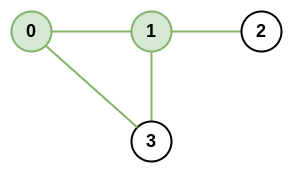

Input: n = 4, roads = [[0,1],[0,3],[1,2],[1,3]]
Output: 4
Explanation: The network rank of cities 0 and 1 is 4 as there are 4 roads that are connected to either 0 or 1. The road between 0 and 1 is only counted once.

In [32]:
from collections import defaultdict
class Solution:
    def maximalNetworkRank(self, n: int, roads) :
        neighbors = {}
        for i in range(n) :
            neighbors[i] = []
        for v, w in roads :
            neighbors[v].append(w)
            neighbors[w].append(v)
        result = defaultdict(list)
        for i in range(len(neighbors)) :
            largest = len(neighbors[i])
            largestindex = i
            for j in range(len(neighbors)) :
                number = len(neighbors[j])
                if largest < number and j not in result :
                    largest = number
                    largestindex = j
            result[largestindex] = neighbors[largestindex]
        
        resultlist = []
        for k, v in result.items() :
            resultlist.append(k)
        maximum = 0
        for i in range(len(resultlist)) :
            for j in range(i+1, len(resultlist)) :
                number = len(result[resultlist[i]]) + len(result[resultlist[j]])
                if resultlist[i] in result[resultlist[j]] :
                    number -= 1
                if maximum < number :
                    maximum = number
        return maximum
    

In [10]:
from collections import defaultdict
class Solution:
    def maximalNetworkRank(self, n: int, roads) :
        neighbors = {}
        for i in range(n) :
            neighbors[i] = []
        for v, w in roads :
            neighbors[v].append(w)
            neighbors[w].append(v)
        
        # neighbors 문자 개수만큼 내림차순으로 정렬
        sorted_neighbors = {k : neighbors[k] for k in sorted(neighbors, key = lambda k : len(neighbors[k]), reverse = True)}
        
        resultlist = []
        for k, v in sorted_neighbors.items() :
            resultlist.append(k)
        maximum = 0
        for i in range(len(resultlist)) :
            for j in range(i+1, len(resultlist)) :
                number = len(sorted_neighbors[resultlist[i]]) + len(sorted_neighbors[resultlist[j]])
                if resultlist[i] in sorted_neighbors[resultlist[j]] :
                    number -= 1
                if maximum < number :
                    maximum = number
        return maximum
    

In [12]:
n = 4
roads = [[0,1],[0,3],[1,2],[1,3]]
S = Solution()
S.maximalNetworkRank(n, roads)

4

In [13]:
n = 5
roads = [[0,1],[0,3],[1,2],[1,3],[2,3],[2,4]]
S = Solution()
S.maximalNetworkRank(n, roads)

5

In [14]:
n = 8
roads = [[0,1],[1,2],[2,3],[2,4],[5,6],[5,7]]
S = Solution()
S.maximalNetworkRank(n, roads)

5

In [15]:
n = 5
roads = [[2,3],[0,3],[0,4],[4,1]]
S = Solution()
S.maximalNetworkRank(n, roads)

4